# ADCP Green Point

In [39]:
import dolfyn.adp.api as adp
import os
import dolfyn as dlfn 
from matplotlib.dates import num2date

import xarray as xr
import glob
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from datetime import datetime
import matplotlib.dates as mdates



# 17-19 Nov

In [18]:
file_path = '/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/ADCP/ADCP_17_19_Nov.nc'

# Open the NetCDF file
ds = xr.open_dataset(file_path)

ds

<xarray.Dataset>
Dimensions:              (time: 546940, dirIMU: 3, dir: 4, range: 54, beam: 4,
                          time_b5: 838664, range_b5: 54, x*: 4, earth: 3,
                          inst: 3)
Coordinates:
  * time                 (time) datetime64[ns] 2024-11-17T23:00:00.126100063 ...
  * dirIMU               (dirIMU) object 'X' 'Y' 'Z'
  * dir                  (dir) int64 1 2 3 4
  * range                (range) float64 0.3 0.5 0.7 0.9 ... 10.3 10.5 10.7 10.9
  * beam                 (beam) int64 1 2 3 4
  * time_b5              (time_b5) float64 1.732e+09 1.732e+09 ... 1.732e+09
  * range_b5             (range_b5) float64 0.3 0.5 0.7 0.9 ... 10.5 10.7 10.9
  * x*                   (x*) int64 1 2 3 4
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/38)
    c_sound              (time) float32 ...
    temp                 (time) float32 ...
    pressure             (time) float32 ...
    mag                  (dirIMU, time) float32 ...
    accel                (dirIMU, time) float32 ...
    batt                 (time) float32 ...
    ...                   ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    beam2inst_orientmat  (beam, x*) float32 ...
    orientmat            (earth, inst, time) float64 ...
    depth                (time) float32 ...

In [19]:
file_path = '/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/ADCP/ADCP_19_21_Nov.nc'

# Open the NetCDF file
ds_19_21 = xr.open_dataset(file_path)

ds_19_21

<xarray.Dataset>
Dimensions:              (time: 446400, dirIMU: 3, dir: 4, range: 54, beam: 4,
                          time_b5: 613456, range_b5: 54, x*: 4, earth: 3,
                          inst: 3)
Coordinates:
  * time                 (time) datetime64[ns] 2024-11-19T23:00:00.126100063 ...
  * dirIMU               (dirIMU) object 'X' 'Y' 'Z'
  * dir                  (dir) int64 1 2 3 4
  * range                (range) float64 0.3 0.5 0.7 0.9 ... 10.3 10.5 10.7 10.9
  * beam                 (beam) int64 1 2 3 4
  * time_b5              (time_b5) float64 1.732e+09 1.732e+09 ... 1.732e+09
  * range_b5             (range_b5) float64 0.3 0.5 0.7 0.9 ... 10.5 10.7 10.9
  * x*                   (x*) int64 1 2 3 4
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/38)
    c_sound              (time) float32 ...
    temp                 (time) float32 ...
    pressure             (time) float32 ...
    mag                  (dirIMU, time) float32 ...
    accel                (dirIMU, time) float32 ...
    batt                 (time) float32 ...
    ...                   ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    beam2inst_orientmat  (beam, x*) float32 ...
    orientmat            (earth, inst, time) float64 ...
    depth                (time) float32 ...

In [20]:
file_path = '/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/ADCP/ADCP_23_25_Nov.nc'

# Open the NetCDF file
ds_23_25 = xr.open_dataset(file_path)

ds_23_25

<xarray.Dataset>
Dimensions:              (time: 662400, dirIMU: 3, dir: 4, range: 54, beam: 4,
                          time_b5: 838796, range_b5: 54, x*: 4, earth: 3,
                          inst: 3)
Coordinates:
  * time                 (time) datetime64[ns] 2024-11-23T10:00:00.126100063 ...
  * dirIMU               (dirIMU) object 'X' 'Y' 'Z'
  * dir                  (dir) int64 1 2 3 4
  * range                (range) float64 0.3 0.5 0.7 0.9 ... 10.3 10.5 10.7 10.9
  * beam                 (beam) int64 1 2 3 4
  * time_b5              (time_b5) float64 1.732e+09 1.732e+09 ... 1.733e+09
  * range_b5             (range_b5) float64 0.3 0.5 0.7 0.9 ... 10.5 10.7 10.9
  * x*                   (x*) int64 1 2 3 4
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/38)
    c_sound              (time) float32 ...
    temp                 (time) float32 ...
    pressure             (time) float32 ...
    mag                  (dirIMU, time) float32 ...
    accel                (dirIMU, time) float32 ...
    batt                 (time) float32 ...
    ...                   ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    beam2inst_orientmat  (beam, x*) float32 ...
    orientmat            (earth, inst, time) float64 ...
    depth                (time) float32 ...

In [21]:
file_path = '/Users/liav/Desktop/Jupyter/01_OTI_Data_2024/ADCP/ADCP_25_26_Nov.nc'

# Open the NetCDF file
ds_25_27 = xr.open_dataset(file_path)
# Clip the dataset to the desired date range and specific hours (e.g., 10:00 to 14:00)
ds_25_27 = ds_25_27.sel(time=slice('2024-11-25T15:00', '2024-11-26T04:00'))


ds_25_27

<xarray.Dataset>
Dimensions:              (time: 187200, dirIMU: 3, dir: 4, range: 54, beam: 4,
                          time_b5: 567616, range_b5: 54, x*: 4, earth: 3,
                          inst: 3)
Coordinates:
  * time                 (time) datetime64[ns] 2024-11-25T15:00:00.126100063 ...
  * dirIMU               (dirIMU) object 'X' 'Y' 'Z'
  * dir                  (dir) int64 1 2 3 4
  * range                (range) float64 0.3 0.5 0.7 0.9 ... 10.3 10.5 10.7 10.9
  * beam                 (beam) int64 1 2 3 4
  * time_b5              (time_b5) float64 1.733e+09 1.733e+09 ... 1.733e+09
  * range_b5             (range_b5) float64 0.3 0.5 0.7 0.9 ... 10.5 10.7 10.9
  * x*                   (x*) int64 1 2 3 4
  * earth                (earth) object 'E' 'N' 'U'
  * inst                 (inst) object 'X' 'Y' 'Z'
Data variables: (12/38)
    c_sound              (time) float32 ...
    temp                 (time) float32 ...
    pressure             (time) float32 ...
    mag                  (dirIMU, time) float32 ...
    accel                (dirIMU, time) float32 ...
    batt                 (time) float32 ...
    ...                   ...
    heading              (time) float32 ...
    pitch                (time) float32 ...
    roll                 (time) float32 ...
    beam2inst_orientmat  (beam, x*) float32 ...
    orientmat            (earth, inst, time) float64 ...
    depth                (time) float32 ...

<!-- # Key Steps:
# Combine Time: We combine the time from all datasets (time_ds, time_ds_19_21, etc.) into a combined_time array using np.concatenate() and np.unique() to remove duplicates and ensure all time points across datasets are included.
# Interpolate Velocity: For each dataset, we interpolate the velocity data (velocity_data) over the common time range (combined_time). We use interp1d on the time axis (axis=1) to interpolate across the depth/range axis.
# Store Results: The interpolated_velocity_list will store the interpolated velocity data for all datasets.
# Outcome:
# After running this code, you will have the velocity data for each dataset, interpolated to a common time range, which can then be plotted together on one graph. -->

# Feather plots

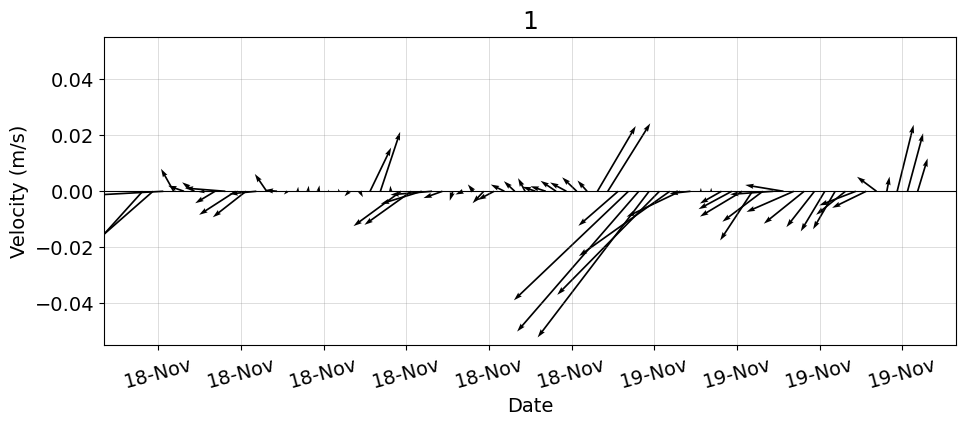

In [22]:
# Assuming the 'vel' variable in your dataset stores the velocity components
# Extract the mean velocity components for East (u) and North (v), time-resampled every 30 minutes
u_inst = ds['vel'].sel(dir=1).mean(dim='range').resample(time="30min").mean().values  # East (u)
v_inst = ds['vel'].sel(dir=2).mean(dim='range').resample(time="30min").mean().values  # North (v)

# Resampled time values for plotting
time_resampled = ds['time'].resample(time="30min").mean().values  # Resampled time for plotting

# Create a centered Y-axis for the quiver plot (placing arrows along y=0)
Y = np.zeros(len(time_resampled))  # All arrows will be placed along this line (y=0)

# Create the Feather plot
plt.figure(figsize=(11, 4))
plt.quiver(time_resampled, Y, u_inst, v_inst, scale=0.7, angles='xy', color='black', width=0.002)

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.8)  # Center Y-axis at zero
plt.xlabel('Date', fontsize=14)
plt.ylabel('Velocity (m/s)', fontsize=14)
plt.title('1', fontsize=18)
plt.grid(color='grey', linestyle='-', linewidth=0.6, alpha=0.3)  # Adjust alpha for transparency
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# x-axis formatting (dates)
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate major ticks
ax.tick_params(axis='x', rotation=15)  # Rotate x-axis labels for readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_feather_plot_1.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

plt.show()  # Display the plot


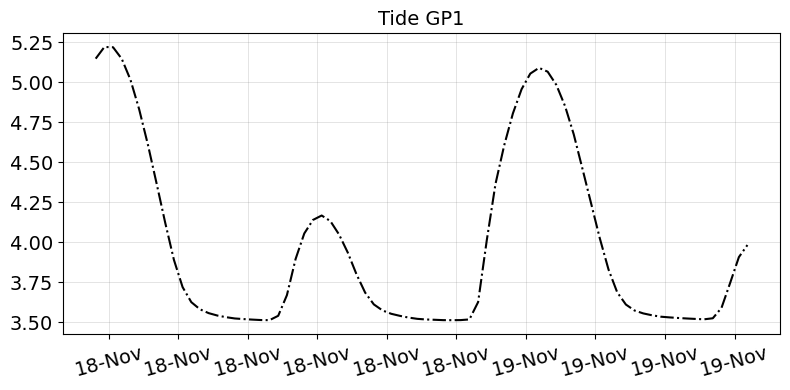

In [23]:
# Tide
# Resample depth to match the time resolution of time_resampled
depth_resampled = ds['depth'].resample(time="30min").mean().values
time_resampled = ds['time'].resample(time="30min").mean().values 

# Plotting the resampled depth over time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time_resampled, depth_resampled, linestyle='-.', lw=1.5, color="black")

# Title and grid
plt.title('Tide GP1', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)  # Adjust alpha for transparency
# plt.legend()
# plt.ylim(0.7,3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Format the x-axis to show only day-month format without the year (e.g., 17-Nov)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Day-Month format (e.g., 17-Nov)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=15)  # Rotate for better readability

# Adjust layout
plt.tight_layout()

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_tide_plot_1.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

# Show the plot
plt.show()

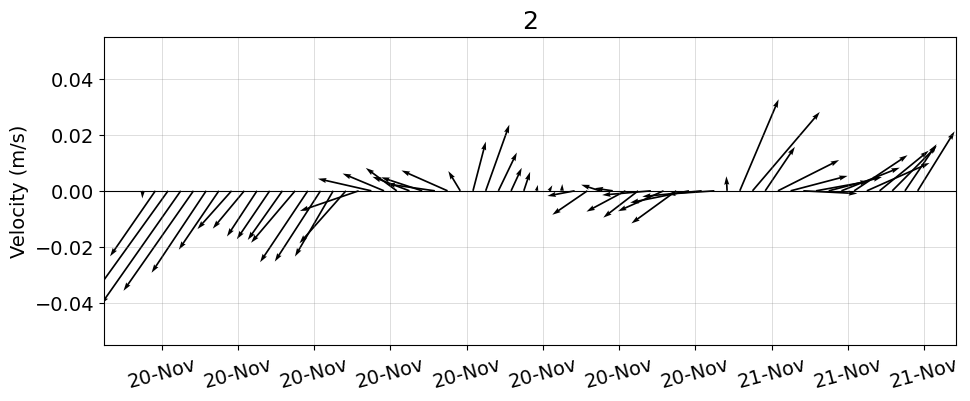

In [24]:
# Assuming the 'vel' variable in your dataset stores the velocity components
# Extract the mean velocity components for East (u) and North (v), time-resampled every 30 minutes
u_inst2 = ds_19_21['vel'].sel(dir=1).mean(dim='range').resample(time="30min").mean().values  # East (u)
v_inst2 = ds_19_21['vel'].sel(dir=2).mean(dim='range').resample(time="30min").mean().values  # North (v)

# Resampled time values for plotting
time_resampled2 = ds_19_21['time'].resample(time="30min").mean().values  # Resampled time for plotting

# Create a centered Y-axis for the quiver plot (placing arrows along y=0)
Y2 = np.zeros(len(time_resampled2))  # All arrows will be placed along this line (y=0)

# Create the Feather plot
plt.figure(figsize=(11, 4))
plt.quiver(time_resampled2, Y2, u_inst2, v_inst2, scale=0.7, angles='xy', color='black', width=0.002)

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.8)  # Center Y-axis at zero
plt.ylabel('Velocity (m/s)', fontsize=14)
plt.title('2', fontsize=18)
plt.grid(color='grey', linestyle='-', linewidth=0.6, alpha=0.3)  # Adjust alpha for transparency
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# x-axis formatting (dates)
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate major ticks
ax.tick_params(axis='x', rotation=15)  # Rotate x-axis labels for readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_feather_plot_2.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

plt.show()  # Display the plot


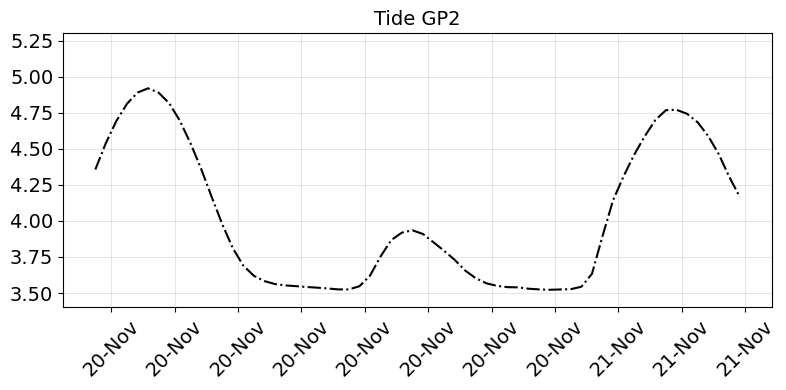

In [25]:
# Tide
# Resample depth to match the time resolution of time_resampled
depth_resampled2 = ds_19_21['depth'].resample(time="30min").mean().values

# Plotting the resampled depth over time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time_resampled2, depth_resampled2, linestyle='-.', lw=1.5, color="black")

# Title and grid
plt.title('Tide GP2', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)  # Adjust alpha for transparency
# plt.legend()
plt.ylim(3.4,5.30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Format the x-axis to show only day-month format without the year (e.g., 17-Nov)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Day-Month format (e.g., 17-Nov)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate for better readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_tide_plot_2.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

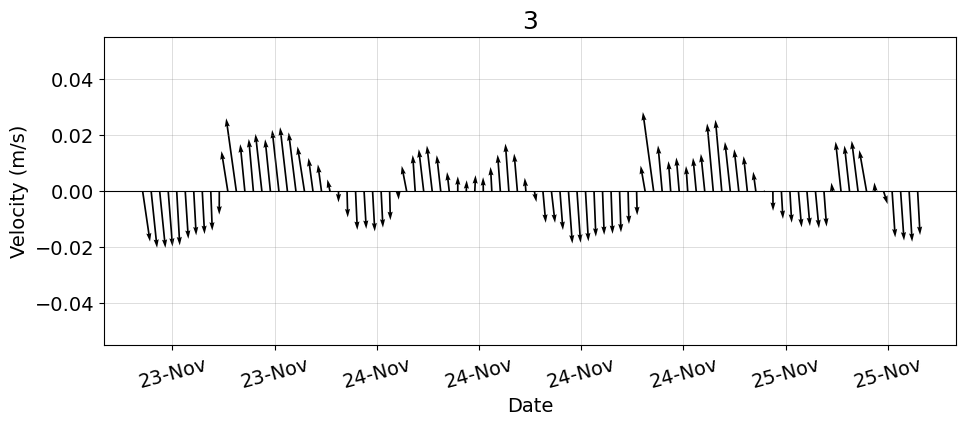

In [26]:
# Assuming the 'vel' variable in your dataset stores the velocity components
# Extract the mean velocity components for East (u) and North (v), time-resampled every 30 minutes
u_inst3 = ds_23_25['vel'].sel(dir=1).mean(dim='range').resample(time="30min").mean().values  # East (u)
v_inst3 = ds_23_25['vel'].sel(dir=2).mean(dim='range').resample(time="30min").mean().values  # North (v)

# Resampled time values for plotting
time_resampled3 = ds_23_25['time'].resample(time="30min").mean().values  # Resampled time for plotting

# Create a centered Y-axis for the quiver plot (placing arrows along y=0)
Y3 = np.zeros(len(time_resampled3))  # All arrows will be placed along this line (y=0)

# Create the Feather plot
plt.figure(figsize=(11, 4))
plt.quiver(time_resampled3, Y3, u_inst3, v_inst3, scale=0.7, angles='xy', color='black', width=0.002)

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.8)  # Center Y-axis at zero
plt.xlabel('Date', fontsize=14)
plt.ylabel('Velocity (m/s)', fontsize=14)
plt.title('3', fontsize=18)
plt.grid(color='grey', linestyle='-', linewidth=0.6, alpha=0.3)  # Adjust alpha for transparency
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# x-axis formatting (dates)
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate major ticks
ax.tick_params(axis='x', rotation=15)  # Rotate x-axis labels for readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_feather_plot_3.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

plt.show()  # Display the plot


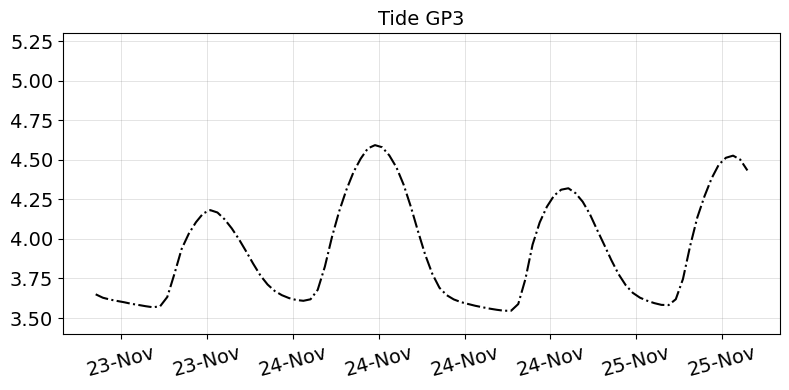

In [27]:
# Tide
# Resample depth to match the time resolution of time_resampled
depth_resampled3 = ds_23_25['depth'].resample(time="30min").mean().values

# Plotting the resampled depth over time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time_resampled3, depth_resampled3, linestyle='-.', lw=1.5, color="black")

# Title and grid
plt.title('Tide GP3', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)  # Adjust alpha for transparency
# plt.legend()
plt.ylim(3.4,5.30)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Format the x-axis to show only day-month format without the year (e.g., 17-Nov)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Day-Month format (e.g., 17-Nov)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=15)  # Rotate for better readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_tide_plot_3.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

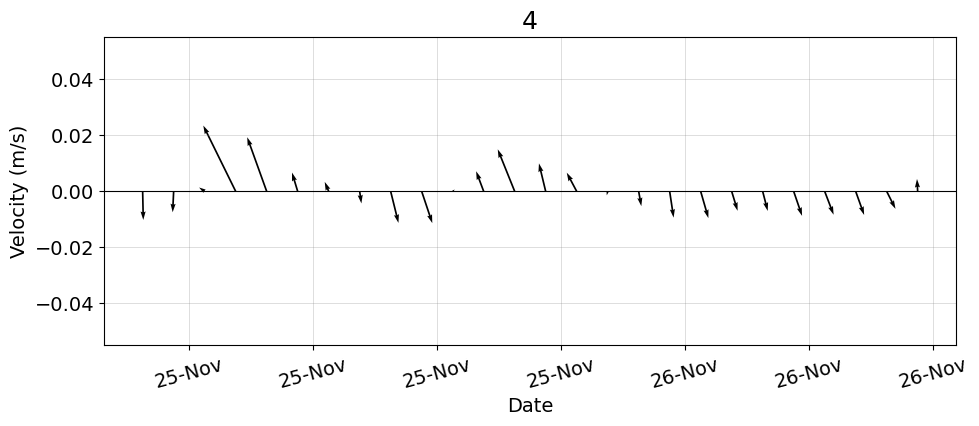

In [28]:
# Assuming the 'vel' variable in your dataset stores the velocity components
# Extract the mean velocity components for East (u) and North (v), time-resampled every 30 minutes
u_inst4 = ds_25_27['vel'].sel(dir=1).mean(dim='range').resample(time="30min").mean().values  # East (u)
v_inst4 = ds_25_27['vel'].sel(dir=2).mean(dim='range').resample(time="30min").mean().values  # North (v)

# Resampled time values for plotting
time_resampled4 = ds_25_27['time'].resample(time="30min").mean().values  # Resampled time for plotting

# Create a centered Y-axis for the quiver plot (placing arrows along y=0)
Y4 = np.zeros(len(time_resampled4))  # All arrows will be placed along this line (y=0)

# Create the Feather plot
plt.figure(figsize=(11, 4))
plt.quiver(time_resampled4, Y4, u_inst4, v_inst4, scale=0.7, angles='xy', color='black', width=0.002)

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.8)  # Center Y-axis at zero
plt.xlabel('Date', fontsize=14)
plt.ylabel('Velocity (m/s)', fontsize=14)
plt.title('4', fontsize=18)
plt.grid(color='grey', linestyle='-', linewidth=0.6, alpha=0.3)  # Adjust alpha for transparency
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# x-axis formatting (dates)
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Format dates as 'day-month'
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Automatically locate major ticks
ax.tick_params(axis='x', rotation=15)  # Rotate x-axis labels for readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_feather_plot_4.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

plt.show()  # Display the plot


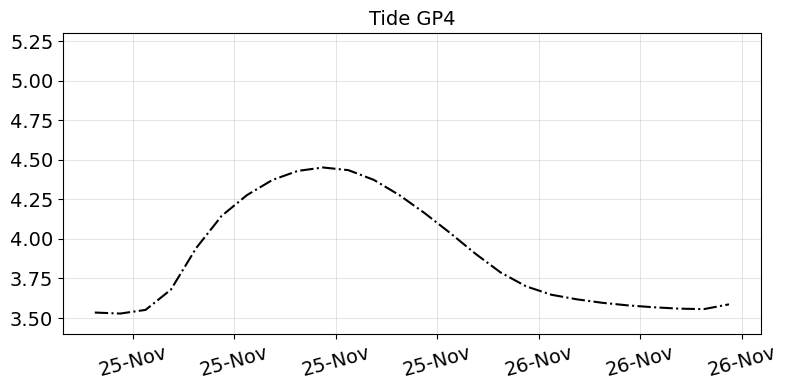

In [29]:
# Tide
# Resample depth to match the time resolution of time_resampled
depth_resampled4 = ds_25_27['depth'].resample(time="30min").mean().values

# Plotting the resampled depth over time
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time_resampled4, depth_resampled4, linestyle='-.', lw=1.5, color="black")

# Title and grid
plt.title('Tide GP4', fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)  # Adjust alpha for transparency
# plt.legend()
plt.ylim(3.4,5.30)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Format the x-axis to show only day-month format without the year (e.g., 17-Nov)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Day-Month format (e.g., 17-Nov)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=15)  # Rotate for better readability

# Save the plot in the desired directory
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'  # Set your desired save directory
os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
file_name = 'ADCP_tide_plot_4.png'  # File name for the plot
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')  # Save the plot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## quiver combined

## tide combined 

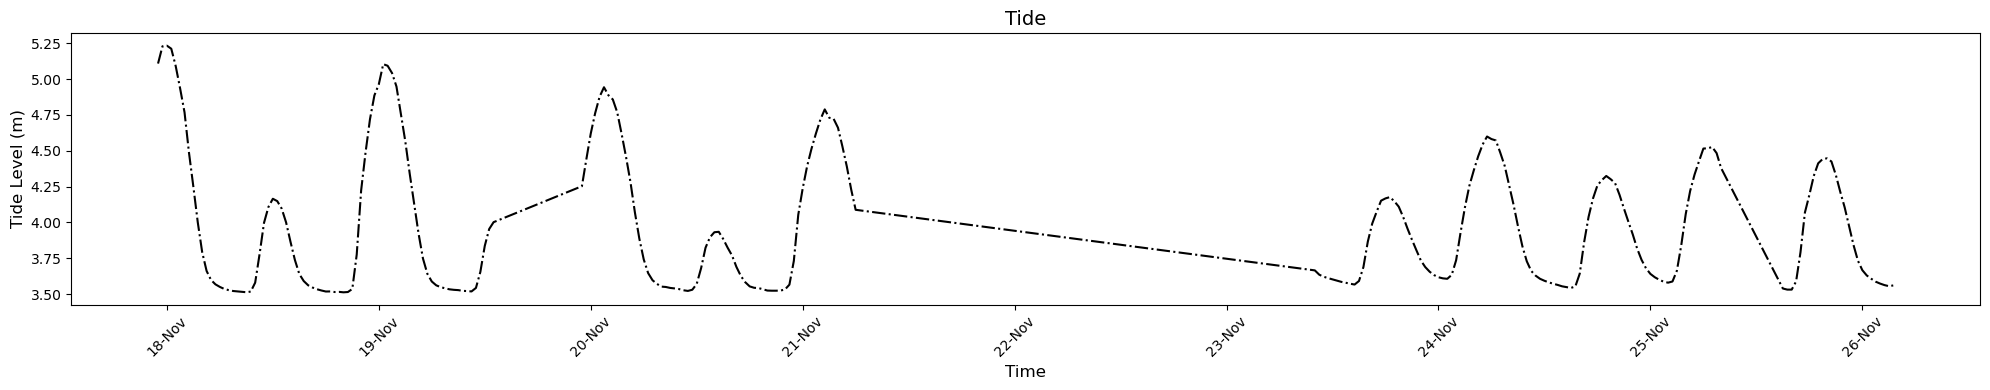

In [30]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Extract depth (pressure) and time from each dataset
depth1 = ds['depth']
depth2 = ds_19_21['depth']
depth3 = ds_23_25['depth']
depth4 = ds_25_27['depth']

time1 = pd.to_datetime(ds['time'].values)  # Convert time to pandas datetime
time2 = pd.to_datetime(ds_19_21['time'].values)
time3 = pd.to_datetime(ds_23_25['time'].values)
time4 = pd.to_datetime(ds_25_27['time'].values)

# Combine depth values from all datasets and time
combined_depth = xr.concat([depth1, depth2, depth3, depth4], dim='time')

# Create a common time range to resample all data (30-minute intervals)
common_time = pd.date_range(start=min(time1.min(), time2.min(), time3.min(), time4.min()), 
                            end=max(time1.max(), time2.max(), time3.max(), time4.max()), 
                            freq='30min')

# Resample all datasets to the same time range
depth_resampled = combined_depth.interp(time=common_time)

# Create figure
fig, ax = plt.subplots(figsize=(20, 4))

# Plot the resampled depth (pressure) data
ax.plot(common_time, depth_resampled, linestyle='-.', lw=1.5, color="black")

# Formatting the plot
ax.set_ylabel('Tide Level (m)', fontsize=12, color='black')
ax.set_xlabel('Time', fontsize=12)

# Format the x-axis to show only day-month format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))  # Day-Month format (e.g., 17-Nov)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)  # Rotate for better readability

# Title and grid
plt.title('Tide', fontsize=14)
# plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.2)  # Adjust alpha for transparency

# Set y-axis limits
# plt.ylim(0.7, 3)
# Save the plot
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'
os.makedirs(save_dir, exist_ok=True)
file_name = 'ADCP_combined_tide_plot.png'
plt.savefig(os.path.join(save_dir, file_name), dpi=300, bbox_inches='tight')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


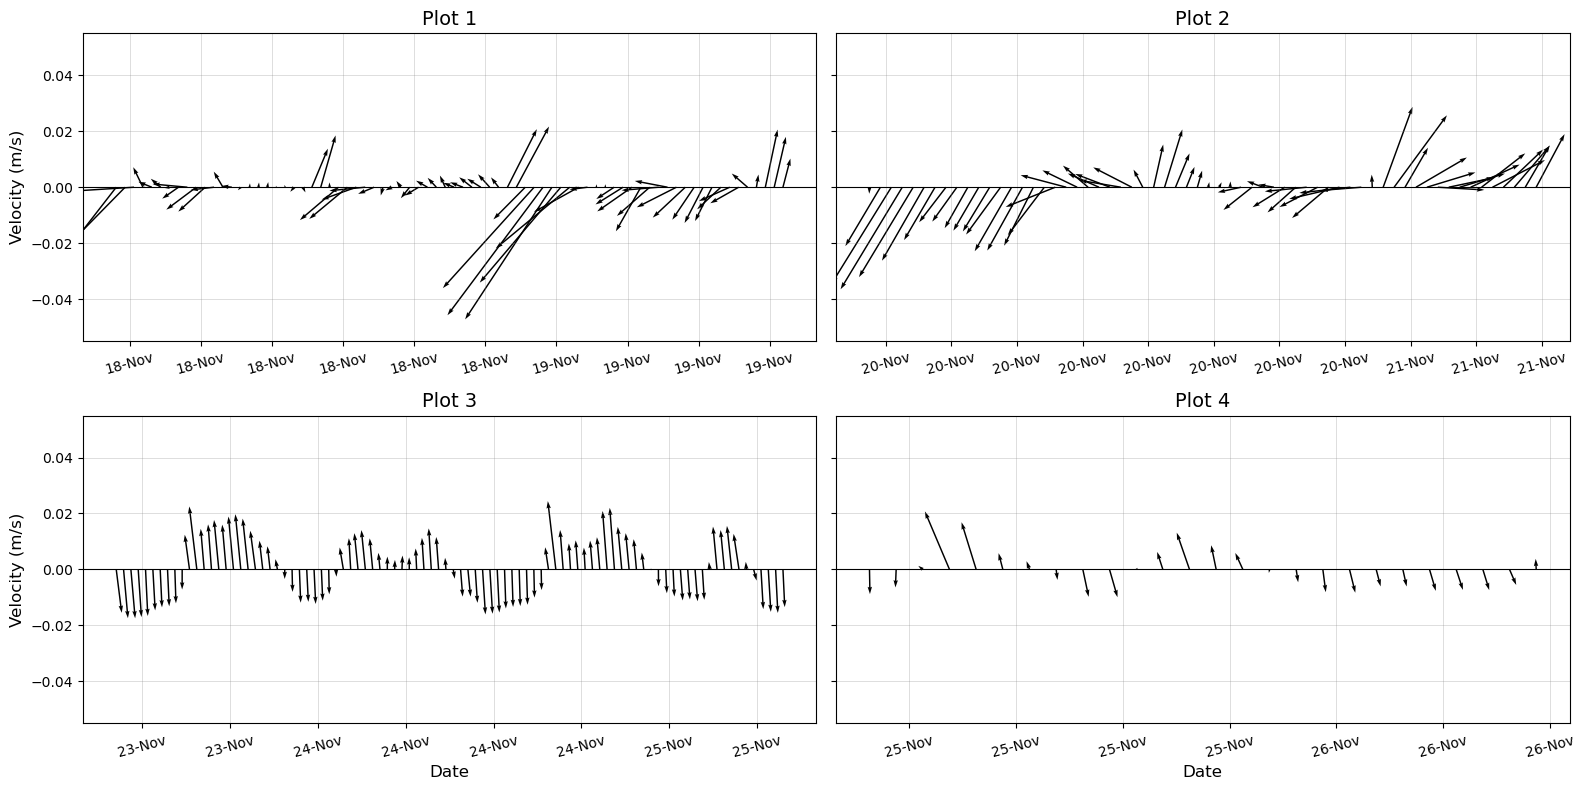

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Define your datasets and titles
datasets = [
    (ds, "1"),
    (ds_19_21, "2"),
    (ds_23_25, "3"),
    (ds_25_27, "4")
]

# Create a 2x2 subplot figure
fig, axes = plt.subplots(2, 2, figsize=(16, 8), sharey=True)
axes = axes.flatten()  # Flatten so we can iterate easily

# Loop through each dataset and corresponding subplot
for i, (ds_current, title) in enumerate(datasets):
    # Calculate u and v components (East and North)
    u_inst = ds_current['vel'].sel(dir=1).mean(dim='range').resample(time="30min").mean().values
    v_inst = ds_current['vel'].sel(dir=2).mean(dim='range').resample(time="30min").mean().values
    time_resampled = ds_current['time'].resample(time="30min").mean().values
    Y = np.zeros(len(time_resampled))

    # Plot quiver
    ax = axes[i]
    ax.quiver(time_resampled, Y, u_inst, v_inst, scale=0.7, angles='xy', color='black', width=0.002)
    ax.axhline(0, color='black', linewidth=0.8)
    ax.set_title(f'Plot {title}', fontsize=14)
    ax.grid(color='grey', linestyle='-', linewidth=0.6, alpha=0.3)
    ax.tick_params(axis='x', labelrotation=15)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.set_xticks(ax.get_xticks())  # Forces consistent x ticks

    if i in [0, 2]:
        ax.set_ylabel('Velocity (m/s)', fontsize=12)
    if i in [2, 3]:
        ax.set_xlabel('Date', fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the combined figure
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'ADCP_feather_combined.png'), dpi=300, bbox_inches='tight')
plt.show()


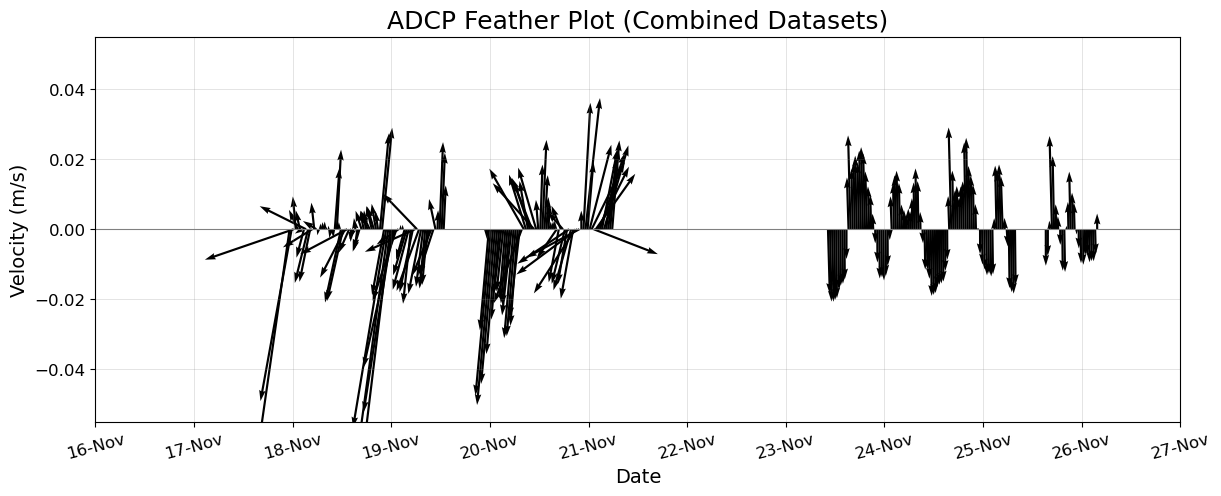

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Helper function to extract u, v, time, Y
def extract_quiver_data(ds):
    u = ds['vel'].sel(dir=1).mean(dim='range').resample(time="30min").mean().values
    v = ds['vel'].sel(dir=2).mean(dim='range').resample(time="30min").mean().values
    time = ds['time'].resample(time="30min").mean().values
    Y = np.zeros(len(time))
    return u, v, time, Y

# Extract and concatenate data from all datasets
datasets = [ds, ds_19_21, ds_23_25, ds_25_27]
all_u, all_v, all_t, all_y = [], [], [], []

for ds_item in datasets:
    u, v, t, y = extract_quiver_data(ds_item)
    all_u.append(u)
    all_v.append(v)
    all_t.append(t)
    all_y.append(y)

# Concatenate all arrays
u_combined = np.concatenate(all_u)
v_combined = np.concatenate(all_v)
t_combined = np.concatenate(all_t)
y_combined = np.concatenate(all_y)

# Plot
plt.figure(figsize=(14, 5))
plt.quiver(t_combined, y_combined, u_combined, v_combined, scale=0.7, angles='xy', width=0.002, color='black')

# Formatting
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Velocity (m/s)', fontsize=14)
plt.title('ADCP Feather Plot (Combined Datasets)', fontsize=18)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format date axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.tick_params(axis='x', rotation=15)
plt.xlim(datetime(2024, 11, 16), datetime(2024, 11, 27))
ax.xaxis.set_major_locator(mdates.DayLocator())

# plt.ylim(0.05,-0.05)

# Save the figure
save_dir = '/Users/liav/Desktop/4 Honours/05_Results/ADCP/Feather'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'ADCP_feather_plot_combined.png'), dpi=300, bbox_inches='tight')

plt.show()
